## Importing packages


In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans


### Data collection and analysis

In [4]:
# loading the data
customer_data = pd.read_csv('Mall_Customers.csv')

In [5]:
# printing the 1st 5 rows
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# printing descriptive statistics of the dataset
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#structure of the data
customer_data.shape

(200, 5)

In [8]:
# Dataset information
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


> for this project am going to use Annual income amd spending score columns

---



In [9]:
X_columns = customer_data.iloc[:,[3,4]].values

### Choosing the number of Clusters using WCSS

In [18]:
# finding wcss value for diff number of clusters
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=45)
  kmeans.fit(X_columns)
  wcss.append(kmeans.inertia_)


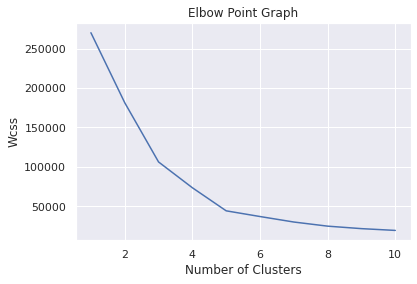

In [19]:
# creating an elbow graph

sn.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()


> The optimal number of clusters is 5

Training The Kmeans Clustering Model

In [20]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#Returning a label for each data point on their cluster
Y = kmeans.fit_predict(X_columns)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


### Clusters Visualization

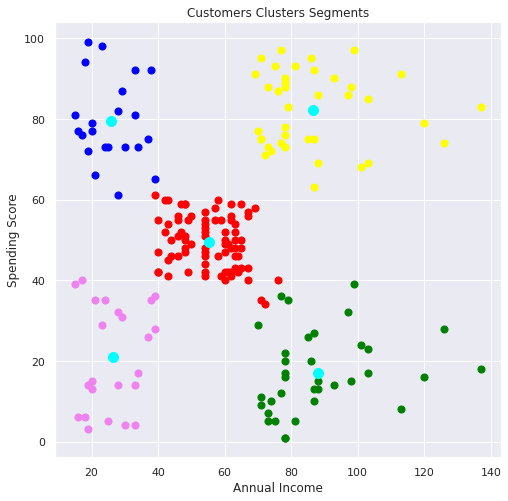

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(X_columns[Y==0,0], X_columns[Y==0,1], s=50, c='green', label="Cluster 1")
plt.scatter(X_columns[Y==1,0], X_columns[Y==1,1], s=50, c='red' ,label="Cluster 2")
plt.scatter(X_columns[Y==2,0], X_columns[Y==2,1], s=50, c='yellow' ,label="Cluster 3")
plt.scatter(X_columns[Y==3,0], X_columns[Y==3,1], s=50, c='blue' ,label="Cluster 4")
plt.scatter(X_columns[Y==4,0], X_columns[Y==4,1], s=50, c='violet' ,label="Cluster 5")
#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('Customers Clusters Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
